In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# import city module
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


634

In [6]:
# Import the requests library
import requests

# Import the API key.
from config import weather_api_key 

In [7]:
# Starting URL for Weather Map API Call.(add "units=imperial")
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=526f2b8b4b6552d3b0247d7263bbcf9d


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chuy
Processing Record 2 of Set 1 | iqaluit
Processing Record 3 of Set 1 | zhuhai
Processing Record 4 of Set 1 | berlevag
Processing Record 5 of Set 1 | kiunga
Processing Record 6 of Set 1 | sitka
Processing Record 7 of Set 1 | faanui
Processing Record 8 of Set 1 | ahipara
Processing Record 9 of Set 1 | sinnamary
Processing Record 10 of Set 1 | tottori
Processing Record 11 of Set 1 | dingle
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | kutum
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | beringovskiy
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | port macquarie
Processing Record 19 of Set 1 | severo-kurilsk
Processing Record 20 of Set 1 | myszkow
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | tarko-sale
Processing Record 23 of

Processing Record 36 of Set 4 | dunedin
Processing Record 37 of Set 4 | vaini
Processing Record 38 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 39 of Set 4 | san angelo
Processing Record 40 of Set 4 | bongandanga
Processing Record 41 of Set 4 | chagda
City not found. Skipping...
Processing Record 42 of Set 4 | kalmunai
Processing Record 43 of Set 4 | saint-philippe
Processing Record 44 of Set 4 | luquillo
Processing Record 45 of Set 4 | dikson
Processing Record 46 of Set 4 | barrow
Processing Record 47 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 48 of Set 4 | santa vitoria
Processing Record 49 of Set 4 | peniche
Processing Record 50 of Set 4 | maceio
Processing Record 1 of Set 5 | prince rupert
Processing Record 2 of Set 5 | sindand
City not found. Skipping...
Processing Record 3 of Set 5 | talcahuano
Processing Record 4 of Set 5 | parnarama
Processing Record 5 of Set 5 | pisco
Processing Record 6 of Set 5 | tingrela
City not found. Skipp

Processing Record 24 of Set 8 | lander
Processing Record 25 of Set 8 | gat
Processing Record 26 of Set 8 | maxixe
Processing Record 27 of Set 8 | mrirt
City not found. Skipping...
Processing Record 28 of Set 8 | hvide sande
Processing Record 29 of Set 8 | tomatlan
Processing Record 30 of Set 8 | klaksvik
Processing Record 31 of Set 8 | hasaki
Processing Record 32 of Set 8 | fuyang
Processing Record 33 of Set 8 | san vicente
Processing Record 34 of Set 8 | jeremie
Processing Record 35 of Set 8 | bestobe
Processing Record 36 of Set 8 | gorkovskoye
City not found. Skipping...
Processing Record 37 of Set 8 | kavieng
Processing Record 38 of Set 8 | ayagoz
Processing Record 39 of Set 8 | cartagena
Processing Record 40 of Set 8 | ibanda
Processing Record 41 of Set 8 | pithoragarh
Processing Record 42 of Set 8 | bartica
Processing Record 43 of Set 8 | kahului
Processing Record 44 of Set 8 | pangai
Processing Record 45 of Set 8 | gagret
Processing Record 46 of Set 8 | moshi
Processing Record 47

City not found. Skipping...
Processing Record 15 of Set 12 | alakurtti
Processing Record 16 of Set 12 | kaeo
Processing Record 17 of Set 12 | colorado springs
Processing Record 18 of Set 12 | coahuayana
Processing Record 19 of Set 12 | le moule
Processing Record 20 of Set 12 | ginda
Processing Record 21 of Set 12 | angra
City not found. Skipping...
Processing Record 22 of Set 12 | liverpool
Processing Record 23 of Set 12 | beloha
Processing Record 24 of Set 12 | maku
Processing Record 25 of Set 12 | qasigiannguit
Processing Record 26 of Set 12 | central point
Processing Record 27 of Set 12 | samana
Processing Record 28 of Set 12 | myitkyina
Processing Record 29 of Set 12 | tromso
Processing Record 30 of Set 12 | tigil
Processing Record 31 of Set 12 | puttur
Processing Record 32 of Set 12 | onega
Processing Record 33 of Set 12 | deputatskiy
Processing Record 34 of Set 12 | soyo
Processing Record 35 of Set 12 | marsh harbour
Processing Record 36 of Set 12 | roma
Processing Record 37 of S

In [10]:
len(city_data)

581

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chuy,-33.70,-53.46,67.80,88,0,4.56,UY,2020-02-20 01:50:55
1,Iqaluit,63.75,-68.51,-31.00,59,40,3.36,CA,2020-02-20 01:50:55
2,Zhuhai,22.28,113.57,66.99,82,20,6.93,CN,2020-02-20 01:46:04
3,Berlevag,70.86,29.09,31.59,66,100,21.52,NO,2020-02-20 01:50:56
4,Kiunga,-6.12,141.29,87.87,71,99,5.01,PG,2020-02-20 01:50:56
5,Sitka,57.05,-135.33,39.20,86,90,9.17,US,2020-02-20 01:50:56
6,Faanui,-16.48,-151.75,82.81,76,100,18.10,PF,2020-02-20 01:50:56
7,Ahipara,-35.17,173.17,70.68,82,93,11.30,NZ,2020-02-20 01:50:56
8,Sinnamary,5.38,-52.95,78.55,75,87,16.02,GF,2020-02-20 01:50:56
9,Tottori,35.50,134.23,44.60,75,75,5.82,JP,2020-02-20 01:48:45


In [12]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chuy,UY,2020-02-20 01:50:55,-33.70,-53.46,67.80,88,0,4.56
1,Iqaluit,CA,2020-02-20 01:50:55,63.75,-68.51,-31.00,59,40,3.36
2,Zhuhai,CN,2020-02-20 01:46:04,22.28,113.57,66.99,82,20,6.93
3,Berlevag,NO,2020-02-20 01:50:56,70.86,29.09,31.59,66,100,21.52
4,Kiunga,PG,2020-02-20 01:50:56,-6.12,141.29,87.87,71,99,5.01
...,...,...,...,...,...,...,...,...,...
576,Manjeshwar,IN,2020-02-20 01:52:56,12.72,74.89,75.20,83,20,4.70
577,Port Shepstone,ZA,2020-02-20 01:52:56,-30.74,30.45,70.74,94,88,5.08
578,Khani,GE,2020-02-20 01:52:56,41.96,42.96,39.20,93,40,3.36
579,Boyuibe,BO,2020-02-20 01:52:56,-20.42,-63.28,67.87,90,83,4.07


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1582163576.996999

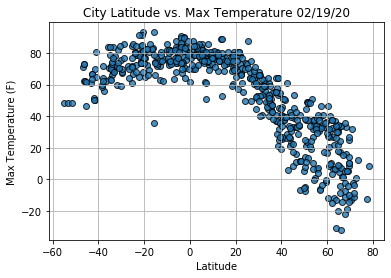

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

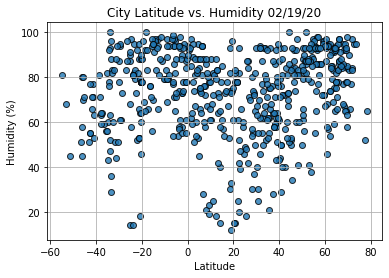

In [82]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

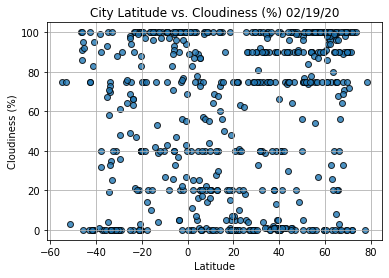

In [83]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

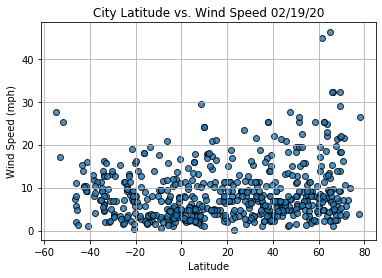

In [84]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [141]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [142]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chuy,UY,2020-02-20 01:50:55,-33.70,-53.46,67.80,88,0,4.56
1,Iqaluit,CA,2020-02-20 01:50:55,63.75,-68.51,-31.00,59,40,3.36
2,Zhuhai,CN,2020-02-20 01:46:04,22.28,113.57,66.99,82,20,6.93
3,Berlevag,NO,2020-02-20 01:50:56,70.86,29.09,31.59,66,100,21.52
4,Kiunga,PG,2020-02-20 01:50:56,-6.12,141.29,87.87,71,99,5.01


In [143]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

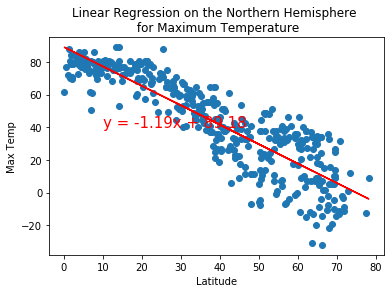

In [144]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.title(f"Linear Regression on the Northern Hemisphere \n for Maximum Temperature")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

In [145]:
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

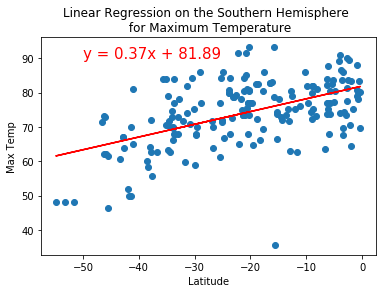

In [146]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.title(f"Linear Regression on the Southern Hemisphere \n for Maximum Temperature")
# Call the function.
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

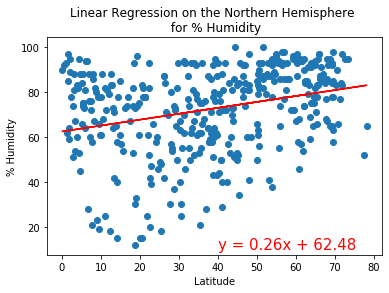

In [147]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.title(f"Linear Regression on the Northern Hemisphere \n for % Humidity")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

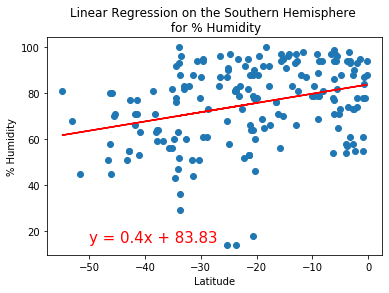

In [148]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.title(f"Linear Regression on the Southern Hemisphere \n for % Humidity")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

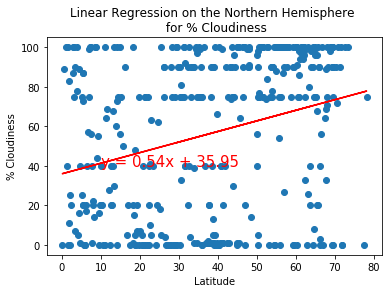

In [149]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.title(f"Linear Regression on the Northern Hemisphere \n for % Cloudiness")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Nouthern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,40))

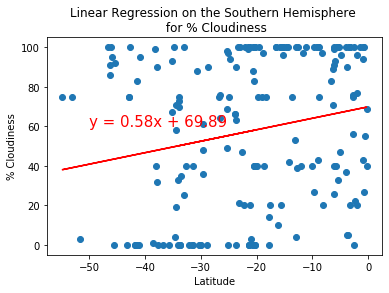

In [150]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.title(f"Linear Regression on the Southern Hemisphere \n for % Cloudiness")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

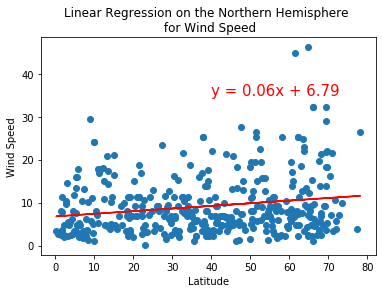

In [151]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.title(f"Linear Regression on the Northern Hemisphere \n for Wind Speed")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

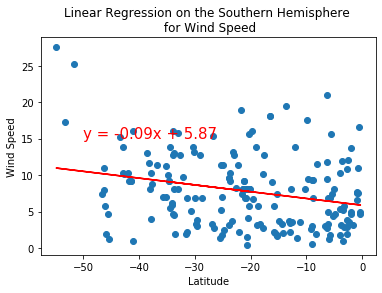

In [153]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.title(f"Linear Regression on the Southern Hemisphere \n for Wind Speed")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,15))